Epoch 0: Cost = 0.2696367200181884
Epoch 1000: Cost = 0.1750060710642713
Epoch 2000: Cost = 0.14613094454674402
Epoch 3000: Cost = 0.1368350751574775
Epoch 4000: Cost = 0.13288176632884824
Epoch 5000: Cost = 0.13080399496399958
Epoch 6000: Cost = 0.12955145571861038
Epoch 7000: Cost = 0.12872371423208248
Epoch 8000: Cost = 0.12814004233797888
Epoch 9000: Cost = 0.12770828200389944
Training complete!


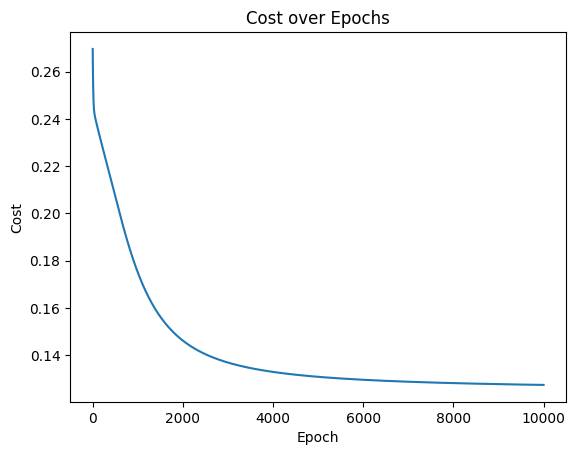

In [ ]:
#Source: https://stackoverflow.com/questions/59399842/xor-gate-with-backpropagation

import numpy as np
import matplotlib.pyplot as plt

def forward_pass(x, w1, b1, w2, b2):
    hidden = np.dot(x, w1) + b1
    hidden = sigmoid(hidden)
    output = np.dot(hidden, w2) + b2
    output = sigmoid(output)
    return hidden, output

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def backward_pass(x, y, hidden, output, w2):
    error_output = output - y
    derivative_output = output * (1 - output)
    gradient_output = error_output * derivative_output

    error_hidden = np.dot(gradient_output, w2.T)
    derivative_hidden = hidden * (1 - hidden)
    gradient_hidden = error_hidden * derivative_hidden

    dw2 = np.dot(hidden.T, gradient_output)
    db2 = np.sum(gradient_output, axis=0)

    dw1 = np.dot(x.T, gradient_hidden)
    db1 = np.sum(gradient_hidden, axis=0)

    return dw1, db1, dw2, db2

def train_xor_gate():

    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([[0],
                  [1],
                  [1],
                  [0]])

    np.random.seed(0)
    w1 = np.random.randn(2, 2)
    b1 = np.zeros((1, 2))
    w2 = np.random.randn(2, 1)
    b2 = np.zeros((1, 1))

    learning_rate = 0.1
    num_epochs = 10000

    costs = []

    for epoch in range(num_epochs):

        hidden, output = forward_pass(X, w1, b1, w2, b2)

        dw1, db1, dw2, db2 = backward_pass(X, y, hidden, output, w2)

        w1 -= learning_rate * dw1
        b1 -= learning_rate * db1
        w2 -= learning_rate * dw2
        b2 -= learning_rate * db2

        cost = np.mean((output - y) ** 2)
        costs.append(cost)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    print("Training complete!")

    plt.plot(range(num_epochs), costs)
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title('Cost over Epochs')
    plt.show()

train_xor_gate()

In [ ]:
import tensorflow as tf
import numpy as np

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=1000, verbose=0)


predictions = model.predict(X)
predictions = np.round(predictions).astype(int)


for i in range(len(X)):
    print(f"Input: {X[i]}  Output: {predictions[i][0]}")


1/1 [==============================] - 0s 102ms/step
Input: [0 0]  Output: 0
Input: [0 1]  Output: 0
Input: [1 0]  Output: 1
Input: [1 1]  Output: 1
